# Load Capacitor Assistant  


In [1]:
import numpy as np
import matplotlib.pyplot as plt

$f_L = f_S(1+\frac{C_1}{2(C_0+C_L)})$

#### Variables to be changed

In [4]:
fs = 32754.5487283421        #250B
cm = 6.88816009324201e-15    #250B
c0 = 1.57470041437137e-12    #250B
cl_nominal = 7e-12           #Datasheet
c1c2 = 5e-12                 #Customer schematic
f_customer_board = 32767.25  #Measured frequency on-board

#### Nominal $F_S$ Calculator
In case FL is provided and Fs is left out.  
$f_S = \frac{f_L}{1+\frac{C_1}{2(C_0+C_L)}}$

In [6]:
# fl_nominal = 32767.98918656
# fs = fl_nominal / ( 1 + cm / ( 2 * ( c0 + cl_nominal ) ) )
# print(f"fs = {fs}")

fs = 32762.08917332905


#### Calculation and Visualization

Ts = -46.84 ppm/pF
Fa = 32826.11Hz
Lm = 3427628.85 mH
Cm = 6.89 fF
C0 = 1.57 pF
Current added CL  = 2.5 pF
Current CL = 7.30700000000061 pF
Board Stray estimate = 4.81 pF
Recommended c1=c2= 4.39 pF


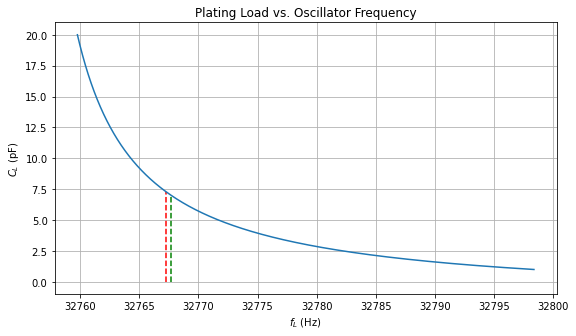

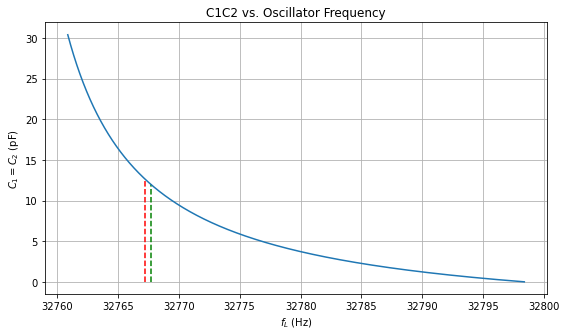

In [20]:
cl = np.arange(1e-12, 20e-12, 1e-15)
fl = fs * ( 1 + cm/( 2 * (c0 + cl) ) )
fa = fs * np.sqrt( 1 + cm/c0 )
lm = ( 1 / ( 2 * np.pi * fs ) )**2 / cm
ts = -( cm / ( 2 * ( c0 + cl_nominal )**2 ) )*1e-6


#Determines closest index to customer board and optimal fl
customer_fl_cl_index = np.abs(fl-f_customer_board).argmin()
optimal_fl_cl_index  = np.abs(cl-cl_nominal).argmin()

cl_current = cl[customer_fl_cl_index]
board_strays = cl_current - c1c2/2
c1c2_recommended = 2*(cl_nominal - board_strays) 

#
# Plating Load vs. Oscillator Frequency
#
plt.figure(figsize=(9,5))
plt.title(f'Plating Load vs. Oscillator Frequency')
plt.ylabel('$C_L$ (pF)')
plt.xlabel('$f_L$ (Hz)')
plt.grid()
plt.plot(fl, cl*1e12)
plt.vlines(fl[customer_fl_cl_index], 0, cl[customer_fl_cl_index]*1e12, 
           linestyles='--', color='red', label='Customer Board')
plt.vlines(fl[optimal_fl_cl_index], 0, cl[optimal_fl_cl_index]*1e12, 
           linestyles='--', color='green', label='Optimal')
# plt.savefig("CL Freq Response.svg", bbox_inches='tight', pad_inches=0.3)

#
# C1C2 vs. Oscillator Frequency
#
c1c2_dist = (2*(cl - board_strays))
c1c2_dist = c1c2_dist[c1c2_dist >= 0]
fl = fl[0:len(c1c2_dist)]

plt.figure(figsize=(9,5))
plt.title(f'C1C2 vs. Oscillator Frequency')
plt.ylabel('$C_1 = C_2$ (pF)')
plt.xlabel('$f_L$ (Hz)')
plt.grid()
plt.plot(fl, c1c2_dist*1e12)
plt.vlines(fl[customer_fl_cl_index], 0, c1c2_dist[customer_fl_cl_index]*1e12, 
           linestyles='--', color='red', label='Customer Board')
plt.vlines(fl[optimal_fl_cl_index], 0, c1c2_dist[optimal_fl_cl_index]*1e12, 
           linestyles='--', color='green', label='Optimal')
# plt.savefig("CL Freq Response.svg", bbox_inches='tight', pad_inches=0.3)


# Text results outputed in-program
print(f"Ts = {round(ts, 2)} ppm/pF")
print(f"Fa = {round(fa, 2)}Hz")
print(f"Lm = {round(lm*1e3, 2)} mH")
print(f"Cm = {round(cm*1e15, 2)} fF")
print(f"C0 = {round(c0*1e12, 2)} pF")
print(f"Current c1=c2 = {c1c2*1e12} pF", file=open("output.txt", 'a'))
print(f"Current added CL  = {c1c2*1e12/2} pF")
print(f"Current CL = {cl_current*1e12} pF")
print(f"Board Stray estimate = {round(board_strays*1e12,2)} pF")
print(f"Recommended c1=c2= {round(c1c2_recommended*1e12, 2)} pF")

# Text results outputed to an output.txt file
print(f"Ts = {round(ts, 2)} ppm/pF", file=open("output.txt", 'w'))
print(f"Fa = {round(fa, 2)}Hz", file=open("output.txt", 'a'))
print(f"Lm = {round(lm*1e3, 2)} mH", file=open("output.txt", 'a'))
print(f"Cm = {round(cm*1e15, 2)} fF", file=open("output.txt", 'a'))
print(f"C0 = {round(c0*1e12, 2)} pF", file=open("output.txt", 'a'))
print(f"Current c1=c2 = {c1c2*1e12} pF", file=open("output.txt", 'a'))
print(f"Current added CL  = {c1c2*1e12/2} pF", file=open("output.txt", 'a'))
print(f"Current CL = {cl_current*1e12} pF", file=open("output.txt", 'a'))
print(f"Board Stray estimate = {round(board_strays*1e12,2)} pF", file=open("output.txt", 'a'))
print(f"Recommended c1=c2= {round(c1c2_recommended*1e12, 2)} pF", file=open("output.txt", 'a'))